In [2]:
%matplotlib inline
import pandas as pds

amazon = pds.read_csv('../../data/sentiment_labelled_sentences/amazon_cells_labelled.txt', sep="\t", header=None)
imdb = pds.read_csv('../../data/sentiment_labelled_sentences/imdb_labelled.txt', sep="\t", header=None)
yelp = pds.read_csv('../../data/sentiment_labelled_sentences/yelp_labelled.txt', sep="\t", header=None)

In [3]:
amazon_null = amazon[amazon[1].isnull()]
amazon = amazon[(amazon[1].notnull())]

train_test = amazon[0]
y = amazon[1]

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))
X = vectorizer.fit_transform(train_test)

In [5]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.grid_search import GridSearchCV
parameters = {'penalty':('l1', 'l2'), 'C':[0.6, 0.8, 1.0, 1.2, 1.4, 1.6]}

clf = GridSearchCV(LogisticRegression(), parameters)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

0.82105263157894748

![f1](https://upload.wikimedia.org/math/9/9/1/991d55cc29b4867c88c6c22d438265f9.png)

Confusion matrix, without normalization
[[88  8]
 [26 78]]


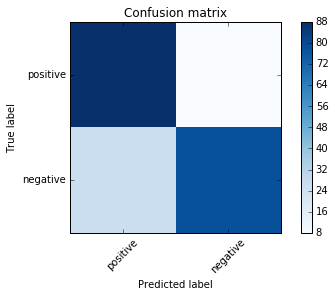

In [158]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    types = ['positive', 'negative']
    tick_marks = np.arange(len(types))
    plt.xticks(tick_marks, types, rotation=45)
    plt.yticks(tick_marks, types)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)


In [129]:
import numpy as np
coef = np.array(cfr.coef_)

positive_idx = np.where( coef > .4 )[1]
negative_idx = np.where( coef < -0.4 )[1]
features = vectorizer.get_feature_names()

In [9]:
review_0 = """
I'm not implying the strategy information is incorrect. I am saying it has a narrow epicenter of interest and those outside Proctor & Gamble and the Rotman School of Management are going to have a rough time staying interested.

In fairness, the book's title should be "P&G: A Look at Corporate Greatness."

I'm interested in winner-take-all strategies but I'm not captivated by overwrought anecdotes about "the P&G diaper business in emerging markets..."
"""
def predict_review(txt):
    X = vectorizer.transform([txt])
    return clf.predict(X)

predict_review(review_0)

array([ 0.])

In [137]:
pos_freq = map(lambda idx: (features[idx], coef[0,idx]), positive_idx )
neg_freq = map(lambda idx: (features[idx], coef[0,idx]), negative_idx )

Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

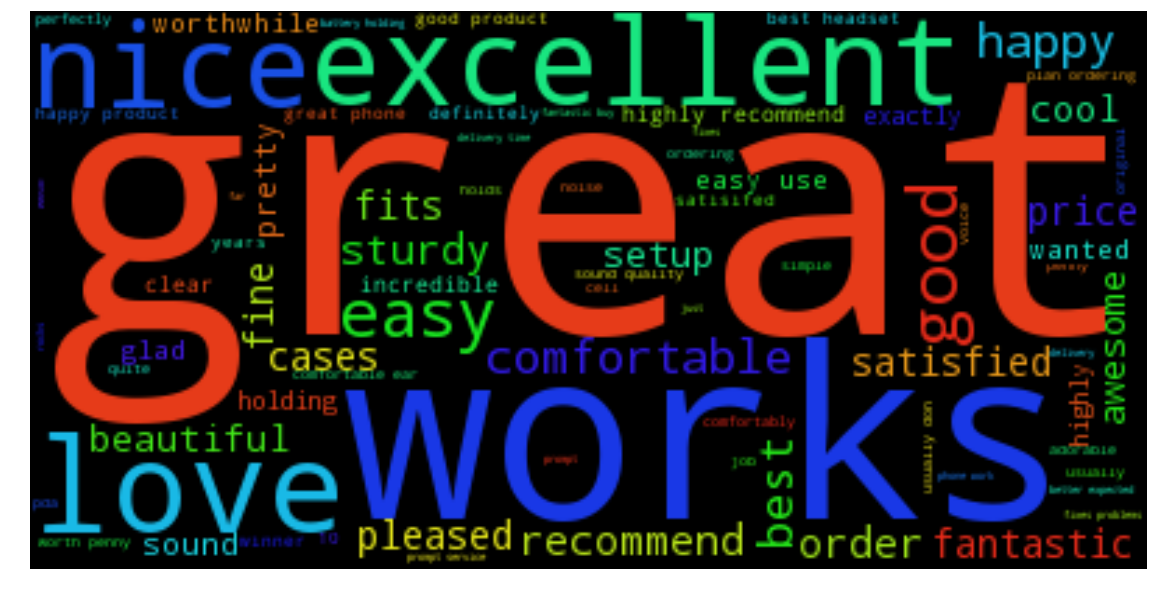

In [162]:
%pylab inline
from wordcloud import WordCloud

wordcloud = WordCloud().generate_from_frequencies(pos_freq)

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

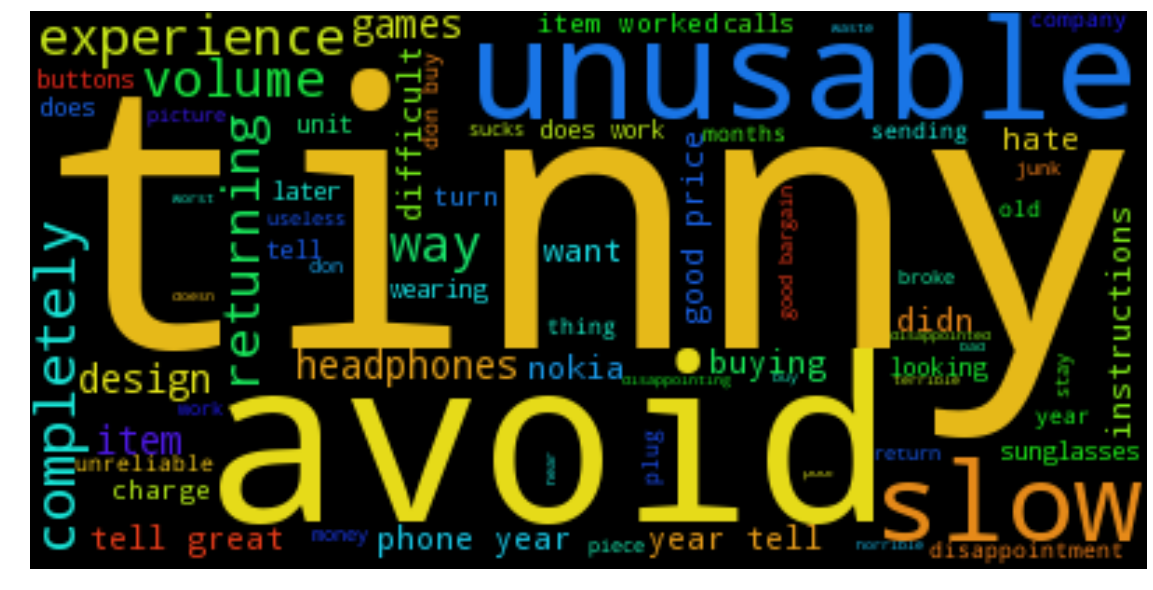

In [161]:
wordcloud = WordCloud().generate_from_frequencies(neg_freq)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")